# Step 3: Connecting axes with content

In [1]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
from tutorial_content import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

Having separated plotting functions from axes layout in the previous 2 steps, we can now put everything together. In principle this is pretty straightforward given what we've covered in the previous two steps, so we'll just go over some common workflows. 

## Color bars:
One particular use-case of specifying grids is that it is a great way to customise the structure/size of color axes. By default, color bars are the extent of the figure:

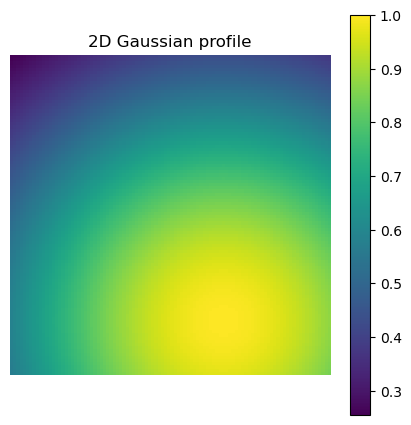

In [2]:
fig = plt.figure(figsize=(5, 5))  # width x height in inches

## Add a grid of subplots:
gs_hm = fig.add_gridspec(ncols=1, nrows=1,  # number of columns and rows
                       bottom=0.05, left=0.05, top=0.85, right=0.85)  # the limits of the grid

ax_hm = fig.add_subplot(gs_hm[0, 0])

tmp = tut.plot_gaussian_profile(ax=ax_hm, cax=None, fig=fig)

By creating an axis for the color bar instead, you can exactly control its size:

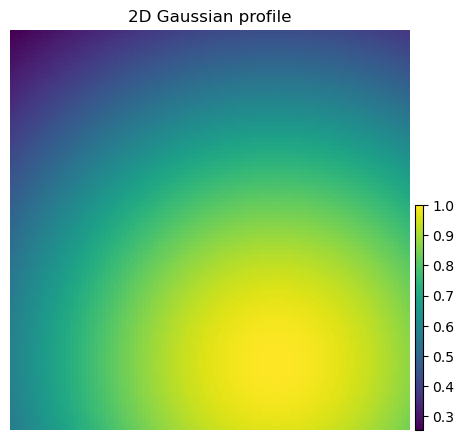

In [3]:
fig = plt.figure(figsize=(5, 5))  # width x height in inches

## Add a grid of subplots:
gs_hm = fig.add_gridspec(ncols=1, nrows=1,  # number of columns and rows
                       bottom=0.05, left=0.05, top=0.85, right=0.85)  # the limits of the grid

gs_cbar = fig.add_gridspec(ncols=4, nrows=1,  # number of columns and rows
                        bottom=0.05, left=0.86, top=0.5, right=0.93)  # the limits of the grid

ax_hm = fig.add_subplot(gs_hm[0, 0])
ax_cbar = fig.add_subplot(gs_cbar[0, 0])

tmp = tut.plot_gaussian_profile(ax=ax_hm, cax=ax_cbar, fig=fig)

(NB: without defining a color bar axis, you can still control the size of the cbar to a certaint extent, although not as much)

## Loops and keywords
Many figures have repetitions across panels; using the same visualisation for different data is best for highlighting differences in the data (rather than the visualisation features). By decomposing plotting functions in parts that are common and unique to specific use-cases, loops can be used effectively. 

One important aspect here is the use of keywords, instead of numeric indices, to index plots. See the example below:

Here, the color is index by keyword: `color_distr = color_dict_names[distr_name]`. The alternative would be using the position/index: `color_distr = color_dict_index[i]`. 

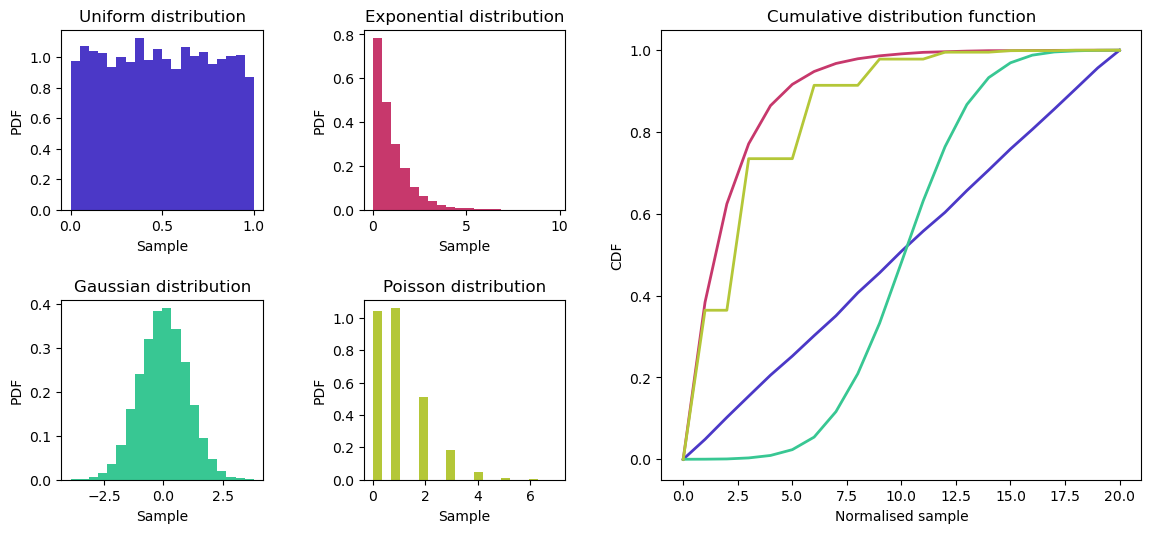

In [4]:
distr_names = ['uniform', 'exp', 'gaussian', 'poisson']
color_dict_names = {'uniform': '#4B38C7', 'exp': '#C7386C', 
                    'poisson': '#B4C738', 'gaussian': '#38C793'}
color_dict_index = {index: val for index, val in enumerate(color_dict_names.values())}

fig = plt.figure(figsize=(12, 5))  # width x height in inches
## Create grids:
gs_pdf = fig.add_gridspec(ncols=2, nrows=2,  # number of columns and rows
                          bottom=0.05, left=0.05, top=0.95, right=0.47,  # the limits of the grid
                            wspace=0.5, hspace=0.5)  # the space between the subplots
gs_cdf = fig.add_gridspec(ncols=1, nrows=1,  # number of columns and rows
                            bottom=0.05, left=0.55, top=0.95, right=0.95)
## Create axes:
ax_cdf = fig.add_subplot(gs_cdf[0, 0])
ax_pdf = [fig.add_subplot(gs_pdf[i // 2, i % 2]) for i in range(len(distr_names))]  # 2 rows, 2 columns

## Fill with content using loop: 
for i, distr_name in enumerate(distr_names):
    ## Index colour by name:
    color_distr = color_dict_names[distr_name]

    ## Alternative, index colour by index:
    # color_distr = color_dict_index[i]
    
    _, pdf = tut.plot_distr(ax=ax_pdf[i], distr_name=distr_name, 
                   color_line=color_distr)
    tut.plot_cdf(ax=ax_cdf, pdf=pdf, 
                color_line=color_distr)

Although for this one figure both colour indexing methods work, the benefit of keyword-indexing becomes clear when we'd like to reuse the same colour scheme in a second figure. Typically, the content will be slightly different so we can't rely on position-indexing to be the same as before. This is illustrated by only plotting two distributions, which results in wrong colours when using position-indexing (right panel).

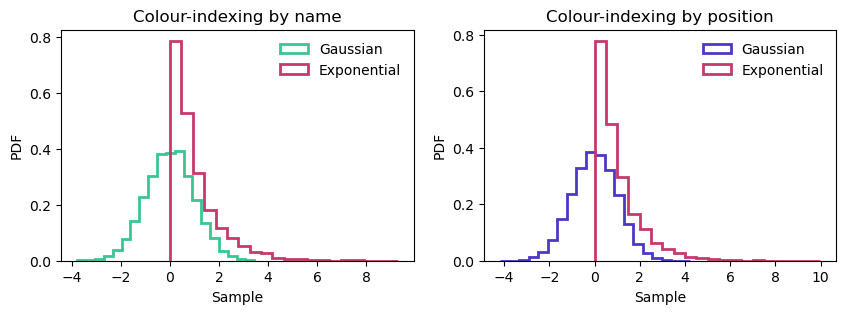

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
distr_plot = ['gaussian', 'exp']

## Index colour by name:
for i, distr_name in enumerate(distr_plot):
    ## Index colour by name:
    color_distr = color_dict_names[distr_name]

    _, pdf = tut.plot_distr(ax=ax[0], distr_name=distr_name, 
                   color_line=color_distr, histtype='step')

for i, distr_name in enumerate(distr_plot):
    ## Index colour by index:
    color_distr = color_dict_index[i]

    _, pdf = tut.plot_distr(ax=ax[1], distr_name=distr_name, 
                   color_line=color_distr, histtype='step')
    
## Override title:
ax[0].set_title('Colour-indexing by name')
ax[1].set_title('Colour-indexing by position')
for curr_ax in ax:
    curr_ax.legend(frameon=False)